In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("bike_sharing.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1.0,0,0.0,1.0,9.84,14.395,81.0,0.0,3.0,13.0,16
1,1/1/2011 1:00,1.0,0,0.0,1.0,9.02,13.635,80.0,0.0,8.0,32.0,40
2,1/1/2011 2:00,1.0,0,0.0,1.0,9.02,13.635,80.0,0.0,5.0,27.0,32
3,1/1/2011 3:00,1.0,0,0.0,1.0,9.84,14.395,75.0,0.0,3.0,10.0,13
4,1/1/2011 4:00,1.0,0,0.0,1.0,9.84,14.395,75.0,0.0,0.0,1.0,1


In [4]:
type(df['datetime'][0])

str

In [9]:
df.isnull().sum()

datetime      0
season        4
holiday       0
workingday    3
weather       4
temp          2
atemp         2
humidity      5
windspeed     3
casual        1
registered    4
count         0
dtype: int64

In [17]:
df.fillna(value=df.mean(),inplace=True).head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1.0,0,0.0,1.0,9.84,14.395,81.0,0.0,3.0,13.0,16
1,1/1/2011 1:00,1.0,0,0.0,1.0,9.02,13.635,80.0,0.0,8.0,32.0,40
2,1/1/2011 2:00,1.0,0,0.0,1.0,9.02,13.635,80.0,0.0,5.0,27.0,32
3,1/1/2011 3:00,1.0,0,0.0,1.0,9.84,14.395,75.0,0.0,3.0,10.0,13
4,1/1/2011 4:00,1.0,0,0.0,1.0,9.84,14.395,75.0,0.0,0.0,1.0,1


In [19]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'Scatter Plot')

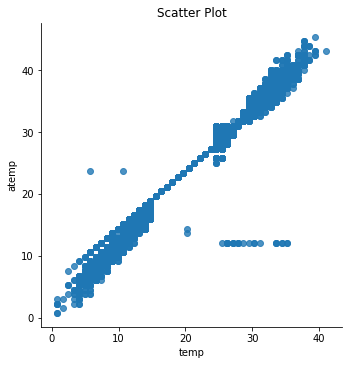

In [219]:
sns.lmplot(x="temp",y="atemp",data=df,fit_reg=False,scatter=True)
# plt.scatter(df['temp'],df['atemp'])
plt.title("Scatter Plot")

In [36]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1.0,0,0.0,1.0,9.84,14.395,81.0,0.0,3.0,13.0,16
1,1/1/2011 1:00,1.0,0,0.0,1.0,9.02,13.635,80.0,0.0,8.0,32.0,40
2,1/1/2011 2:00,1.0,0,0.0,1.0,9.02,13.635,80.0,0.0,5.0,27.0,32
3,1/1/2011 3:00,1.0,0,0.0,1.0,9.84,14.395,75.0,0.0,3.0,10.0,13
4,1/1/2011 4:00,1.0,0,0.0,1.0,9.84,14.395,75.0,0.0,0.0,1.0,1


In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [67]:
X=df.drop('count',axis=1)
X.drop('datetime',axis=1,inplace=True)

In [53]:
Y=df['count']

In [223]:
# print(float(X['datetime'][1].split(" ")[1].split(":")[0]))

In [69]:
reg=LinearRegression()
reg=reg.fit(X,Y)

array([ 1.1597869])

In [229]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model.base:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin)
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please use
 |      :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
 |      an estimator with ``normalize=False``.
 |  
 |  copy_X : boolean, optional, default True
 |      If True, X will be copied; else, it may be overwritten.
 | 

In [73]:
y_pred=reg.predict(X)
y_pred

array([  15.76202979,   39.77289165,   31.76930552, ...,  168.23977593,
        129.17991097,   88.19059919])

In [78]:
mse=mean_squared_error(Y,y_pred)
rmse = np.sqrt(mse)
rmse

4.7765213083310298

In [80]:
r2_score=reg.score(X,Y)
r2_score

0.99930463431960648

In [220]:
from sklearn.decomposition import PCA

In [149]:
pca9=PCA(n_components=9)
pca9.fit(X)

pca8=PCA(n_components=8)
pca8.fit(X)

pca7=PCA(n_components=7)
pca7.fit(X)

pca6=PCA(n_components=6)
pca6.fit(X)

pca5=PCA(n_components=5)
pca5.fit(X)

pca4=PCA(n_components=4)
pca4.fit(X)

pca3=PCA(n_components=3)
pca3.fit(X)

pca2=PCA(n_components=2)
pca2.fit(X)

pca1=PCA(n_components=1)
pca1.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [151]:
X_pca9=pca9.transform(X)

X_pca8=pca8.transform(X)

X_pca7=pca7.transform(X)

X_pca6=pca6.transform(X)

X_pca5=pca5.transform(X)

X_pca4=pca4.transform(X)

X_pca3=pca3.transform(X)

X_pca2=pca2.transform(X)

X_pca1=pca1.transform(X)

In [156]:
reg1=LinearRegression()
reg1=reg.fit(X_pca1,Y)

reg2=LinearRegression()
reg2=reg2.fit(X_pca2,Y)

reg3=LinearRegression()
reg3=reg3.fit(X_pca3,Y)

reg4=LinearRegression()
reg4=reg4.fit(X_pca4,Y)

reg5=LinearRegression()
reg5=reg5.fit(X_pca5,Y)

reg6=LinearRegression()
reg6=reg6.fit(X_pca6,Y)

reg7=LinearRegression()
reg7=reg7.fit(X_pca7,Y)

reg8=LinearRegression()
reg8=reg8.fit(X_pca8,Y)

reg9=LinearRegression()
reg9=reg9.fit(X_pca9,Y)

In [158]:
y_pred1=reg1.predict(X_pca1)

y_pred2=reg2.predict(X_pca2)

y_pred3=reg3.predict(X_pca3)

y_pred4=reg4.predict(X_pca4)

y_pred5=reg5.predict(X_pca5)

y_pred6=reg6.predict(X_pca6)

y_pred7=reg7.predict(X_pca7)

y_pred8=reg8.predict(X_pca8)

y_pred9=reg9.predict(X_pca9)

In [163]:
mse=[]
mse.append(mean_squared_error(Y,y_pred1))
mse.append(mean_squared_error(Y,y_pred2))
mse.append(mean_squared_error(Y,y_pred3))
mse.append(mean_squared_error(Y,y_pred4))
mse.append(mean_squared_error(Y,y_pred5))
mse.append(mean_squared_error(Y,y_pred6))
mse.append(mean_squared_error(Y,y_pred7))
mse.append(mean_squared_error(Y,y_pred8))
mse.append(mean_squared_error(Y,y_pred9))

rmse=[]
for i in mse:
    rmse.append(np.sqrt(i))
    
r2_score=[]    
r2_score.append(reg1.score(X_pca1,Y))
r2_score.append(reg2.score(X_pca2,Y))
r2_score.append(reg3.score(X_pca3,Y))
r2_score.append(reg4.score(X_pca4,Y))
r2_score.append(reg5.score(X_pca5,Y))
r2_score.append(reg6.score(X_pca6,Y))
r2_score.append(reg7.score(X_pca7,Y))
r2_score.append(reg8.score(X_pca8,Y))
r2_score.append(reg9.score(X_pca9,Y))


In [186]:
r2_score

[0.96354001338700201,
 0.99909429680134454,
 0.99925603138847796,
 0.99930411398741159,
 0.99930412540785674,
 0.99930454167987981,
 0.99930455035729637,
 0.99930462354403515,
 0.99930463042932405]

Text(0.5,1,'R^2 vs Dimensions')

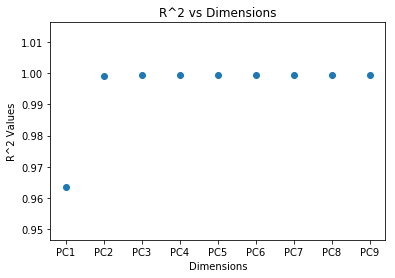

In [203]:
x=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9"]
plt.scatter(x,r2_score)
plt.xlabel("Dimensions")
plt.ylabel("R^2 Values")
plt.title("R^2 vs Dimensions")

Text(0.5,1,'RMSE vs Dimensions')

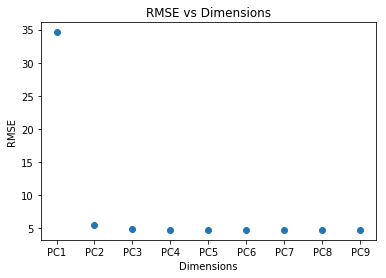

In [204]:
plt.scatter(x,rmse)
plt.xlabel("Dimensions")
plt.ylabel("RMSE")
plt.title("RMSE vs Dimensions")

In [184]:
rmse

[34.587035984029747,
 5.4512744060540941,
 4.9406307801752716,
 4.7783080754357048,
 4.7782688659761963,
 4.7768394725028456,
 4.7768096714681914,
 4.7765583173092434,
 4.7765346696398714]

Text(0,0.5,'% variance')

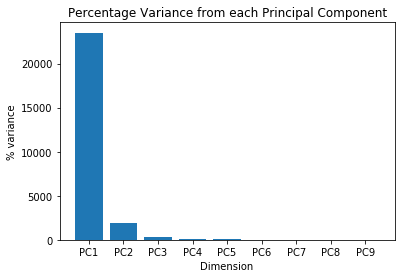

In [205]:
plt.bar(x,pca9.explained_variance_)
plt.title("Percentage Variance from each Principal Component")
plt.xlabel("Dimension")
plt.ylabel("% variance")


In [209]:
# pca9.components_

In [141]:
# help(plt.scatter)

In [140]:
# plt.scatter(X_pca[:,0],X_pca[:,1])

In [110]:
from sklearn.metrics import confusion_matrix

In [122]:
y_predicted=np.array(y_pred)
y_original=np.array(Y)

In [136]:
# y_predicted[1]
y_original[1]

40

In [134]:
n=len(y_predicted)

In [178]:
TP=0
TN=0
FN=0
FP=0
for i in range(n):
    if(y_predicted[i]==y_original[i]):
        if(y_original==True):
            TP+=1
        else:
            FP+=1
    else:
        if(y_original==True):
            TN+=1
        else:
            FN+=1        
conf_mat = [TP,TN,FN,FP]        

In [ ]:
accuracy_score =  (TP+FP)/(TP+FP+TN+FN)

In [248]:
help(LogisticRegression())

Help on LogisticRegression in module sklearn.linear_model.logistic object:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
 |  entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It can handle
 |  both dense and sparse input. Use C-ordered arrays or CSR matrices
 |  containing 64-bit floats for optimal performance; any other input format
 |  will be converted (and copied).
 |  
 |  The 'newton-cg', 'sag', and 'lbfgs' solv

In [274]:
Y=df['count']

In [269]:
from sklearn.linear_model import LogisticRegression
logg=LogisticRegression()

In [275]:
logistics=logg.fit(X,Y)

In [257]:
y_pr=logistics.predict(X)

In [262]:
y_pr

array([ 18,  32,  32, ..., 124, 199, 114], dtype=int64)

In [263]:
confusion_matrix(Y,y_pr)

array([[105,   0,   0, ...,   0,   0,   0],
       [  1,  46,  58, ...,   0,   0,   0],
       [  0,  28,  51, ...,   0,   0,   0],
       ..., 
       [  0,   0,   0, ...,   1,   0,   0],
       [  0,   0,   0, ...,   0,   1,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=int64)

In [266]:
logistics.score(X,Y)

0.06650744074958663

In [279]:
he

pandas.core.series.Series